In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\Happy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np #Linear algebra
import pandas as pd #data processing
pd.set_option('Display.max_column',None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [3]:
data=pd.read_csv("startup data.csv")
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


In [5]:
df_cat=data.select_dtypes(include='object')
df_cat.head(4)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired


In [6]:
print(data['status'].unique())

['acquired' 'closed']


In [7]:
print("Before mapping:", data.shape)
print(data['status'].dropna().astype(str).str.strip().str.lower().value_counts())

data['status'] = data['status'].astype(str).str.strip().str.lower()
data['status'] = data['status'].map({'acquired': 1, 'closed': 0})
data = data.dropna(subset=['status'])
data['status'] = data['status'].astype(int)

print("After cleaning:", data.shape)
print(data['status'])

Before mapping: (923, 49)
status
acquired    597
closed      326
Name: count, dtype: int64
After cleaning: (923, 49)
0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64


In [8]:
for index,row in data.iterrows():
    if row['labels']!=row['labels']:
        print(index,row['labels'],row['status'])
data.drop(['labels'],axis=1,inplace=True)

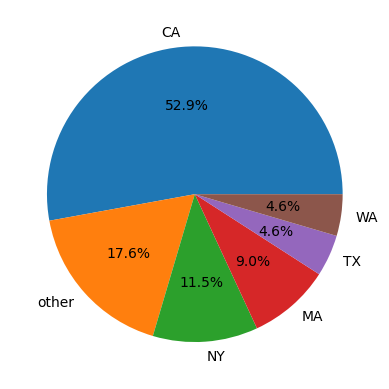

In [9]:

import matplotlib.pyplot as plt

data['State'] = 'other'
data.loc[data['state_code'] == 'CA', 'State'] = 'CA'
data.loc[data['state_code'] == 'NY', 'State'] = 'NY'
data.loc[data['state_code'] == 'MA', 'State'] = 'MA'
data.loc[data['state_code'] == 'TX', 'State'] = 'TX'
data.loc[data['state_code'] == 'WA', 'State'] = 'WA'
state_count = data['State'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.show()

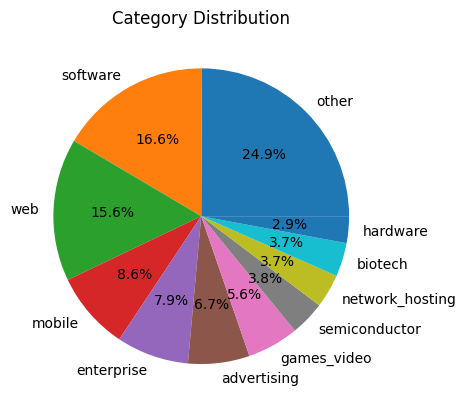

In [10]:
# Create category column with default value
data['category'] = 'other'

# Assign categories based on category_code
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

# Count values
category_count = data['category'].value_counts()

plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.title("Category Distribution")
plt.show()


Text(0.5, 1.0, 'Distribution of Status of the Startup')

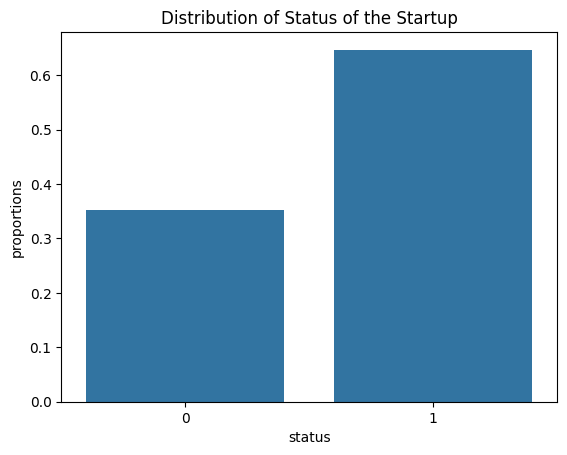

In [11]:
# Group by status and calculate counts
prop_df = data.groupby('status').size().reset_index(name='counts')

# Calculate proportions
prop_df['proportions'] = prop_df['counts'] / prop_df['counts'].sum()
sns.barplot(data=prop_df, x='status', y='proportions')
plt.title('Distribution of Status of the Startup')



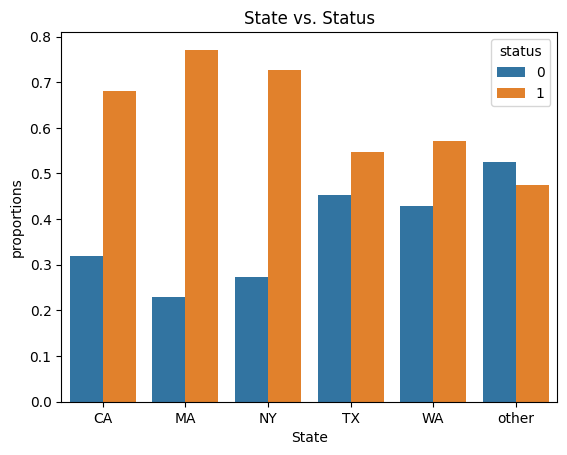

In [12]:

prop_df = data.groupby(['State', 'status'], group_keys=True).size().reset_index(name='count')
prop_df['proportions'] = prop_df.groupby('State')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=prop_df, x='State', y='proportions', hue='status')
plt.title('State vs. Status')
plt.show()

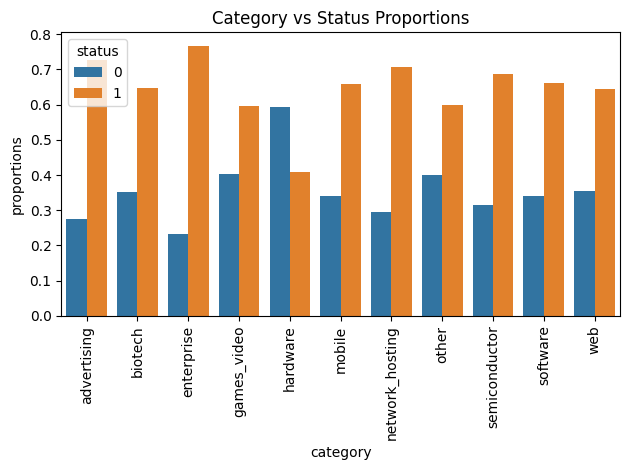

In [13]:
prop_df = data.groupby(["category", "status"]).size().reset_index(name="counts")
prop_df["proportions"] = prop_df.groupby("category")["counts"].transform(lambda x: x / float(x.sum()))
sns.barplot(data=prop_df, x="category", y="proportions", hue="status")
plt.xticks(rotation=90)
plt.title("Category vs Status Proportions")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Category wise evolution of startups')

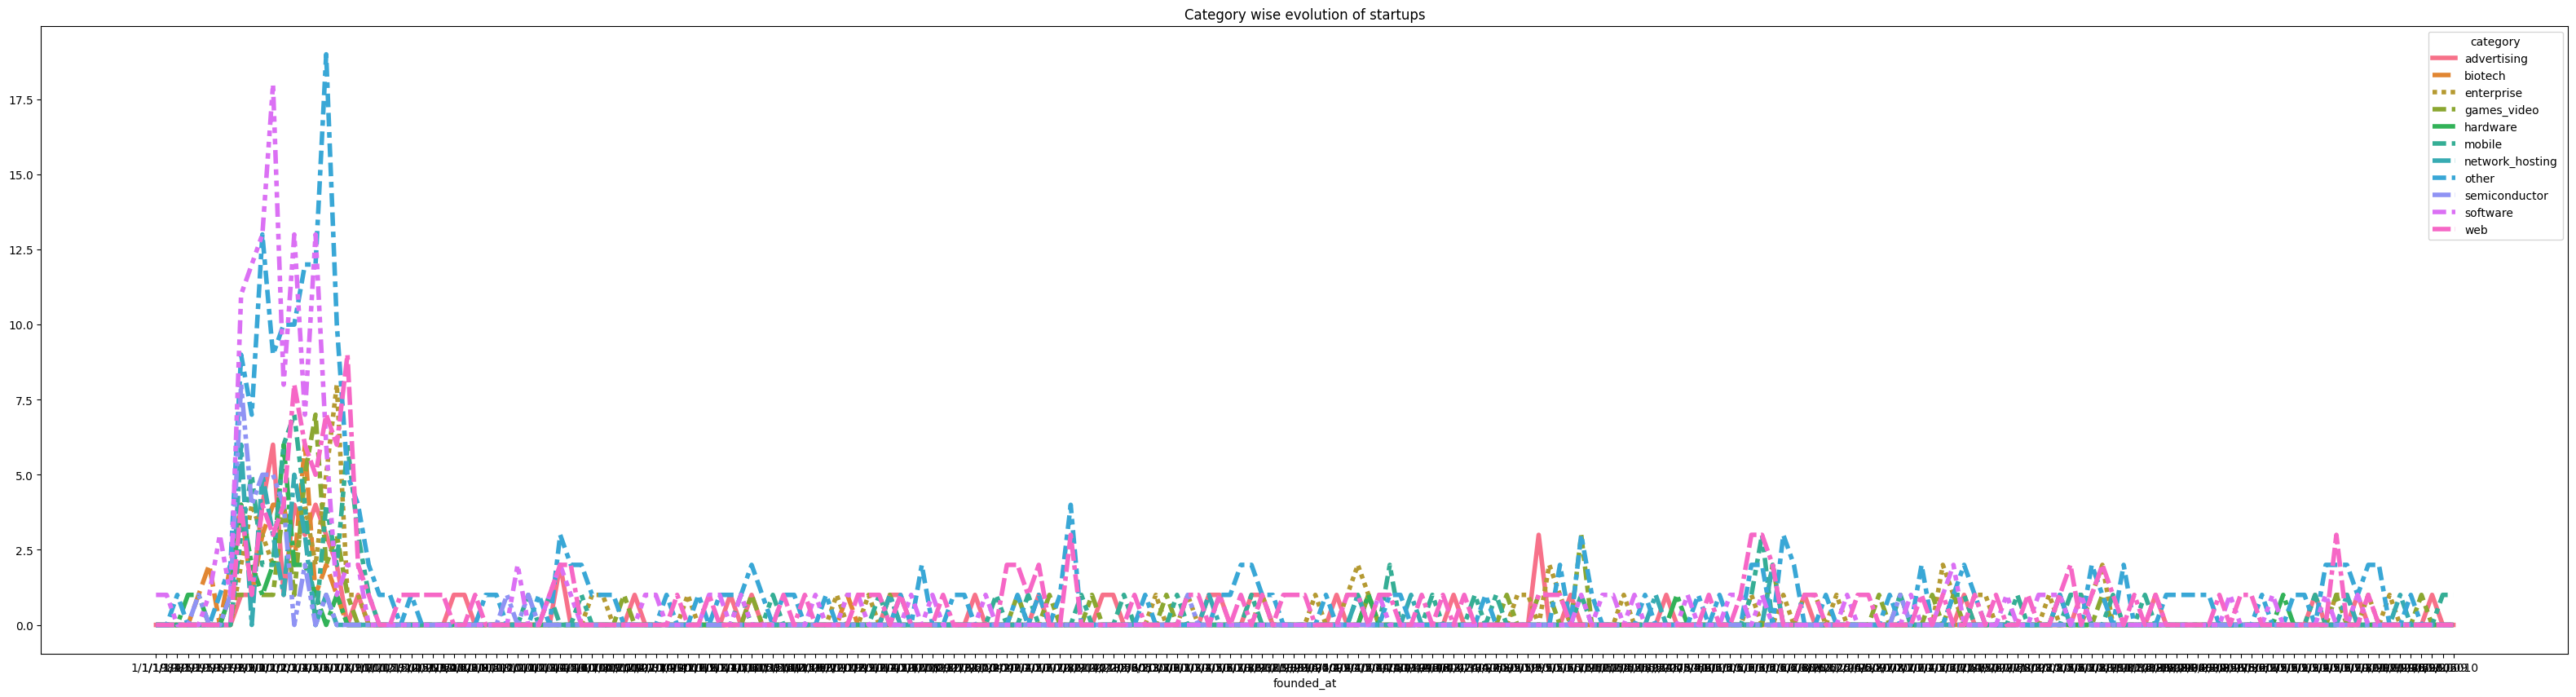

In [14]:
cat_year = pd.crosstab(index=data['founded_at'], columns=data['category'])
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=cat_year, lw=4)
plt.title("Category wise evolution of startups")

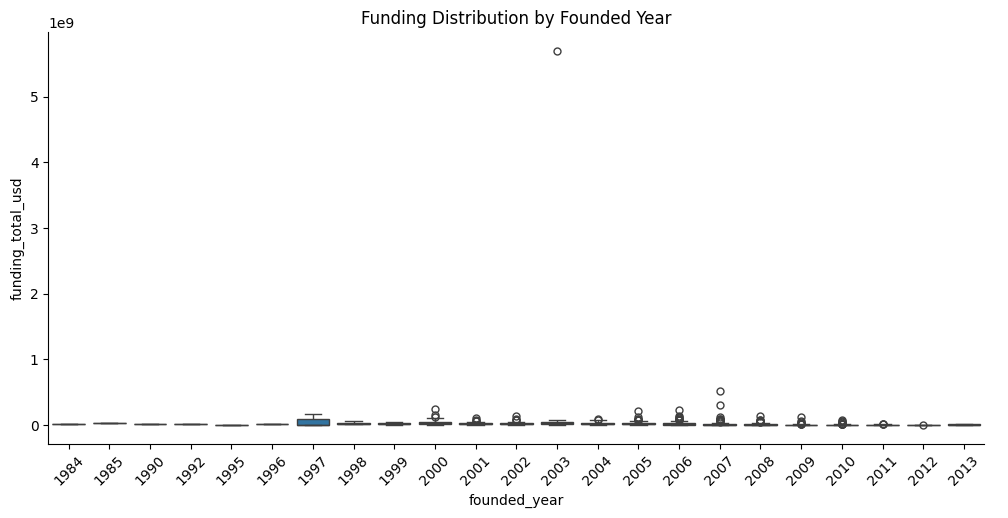

In [15]:
data['founded_year'] = pd.to_datetime(data['founded_at'], errors='coerce').dt.year.astype(str)
sns.catplot(
    data=data,
    x="founded_year",
    y="funding_total_usd",
    kind="box",
    height=5,
    aspect=2,
    order=[
        '1984', '1985', '1990', '1992', '1995',
        '1996', '1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013'
    ]
)

plt.xticks(rotation=45)
plt.title("Funding Distribution by Founded Year")
plt.show()


<Axes: >

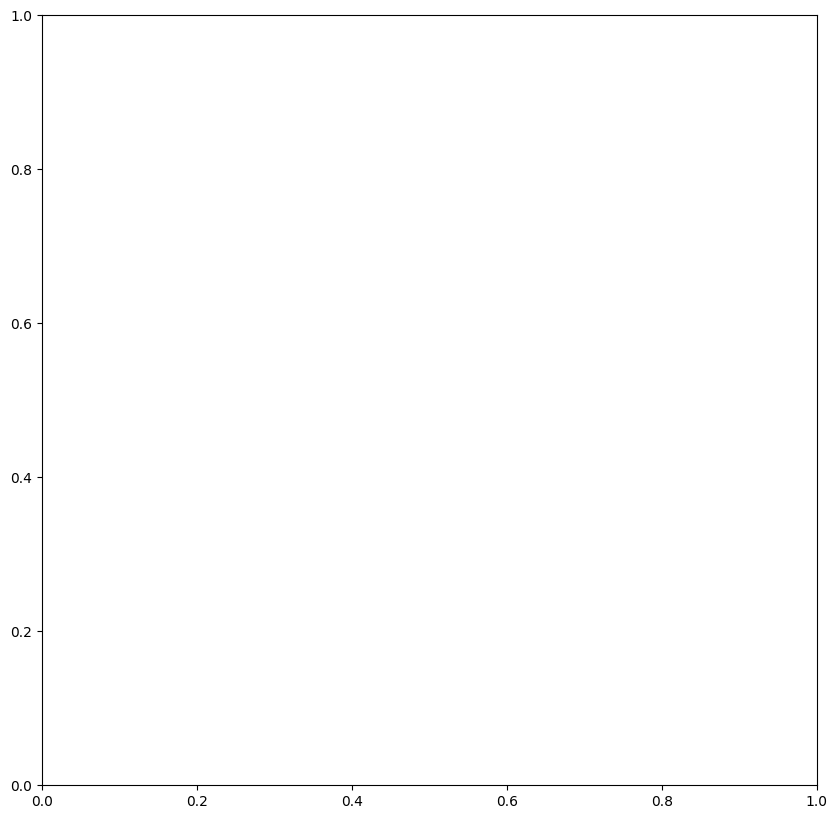

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
d = data.loc[data['status'] == '1']
# Select required columns
f = d[[
    "has_VC",
    "has_angel",
    "has_roundA",
    "has_roundB",
    "has_roundC",
    "has_roundD"
]]

# Plot
sns.countplot(data=pd.melt(f), x='variable', hue='value')



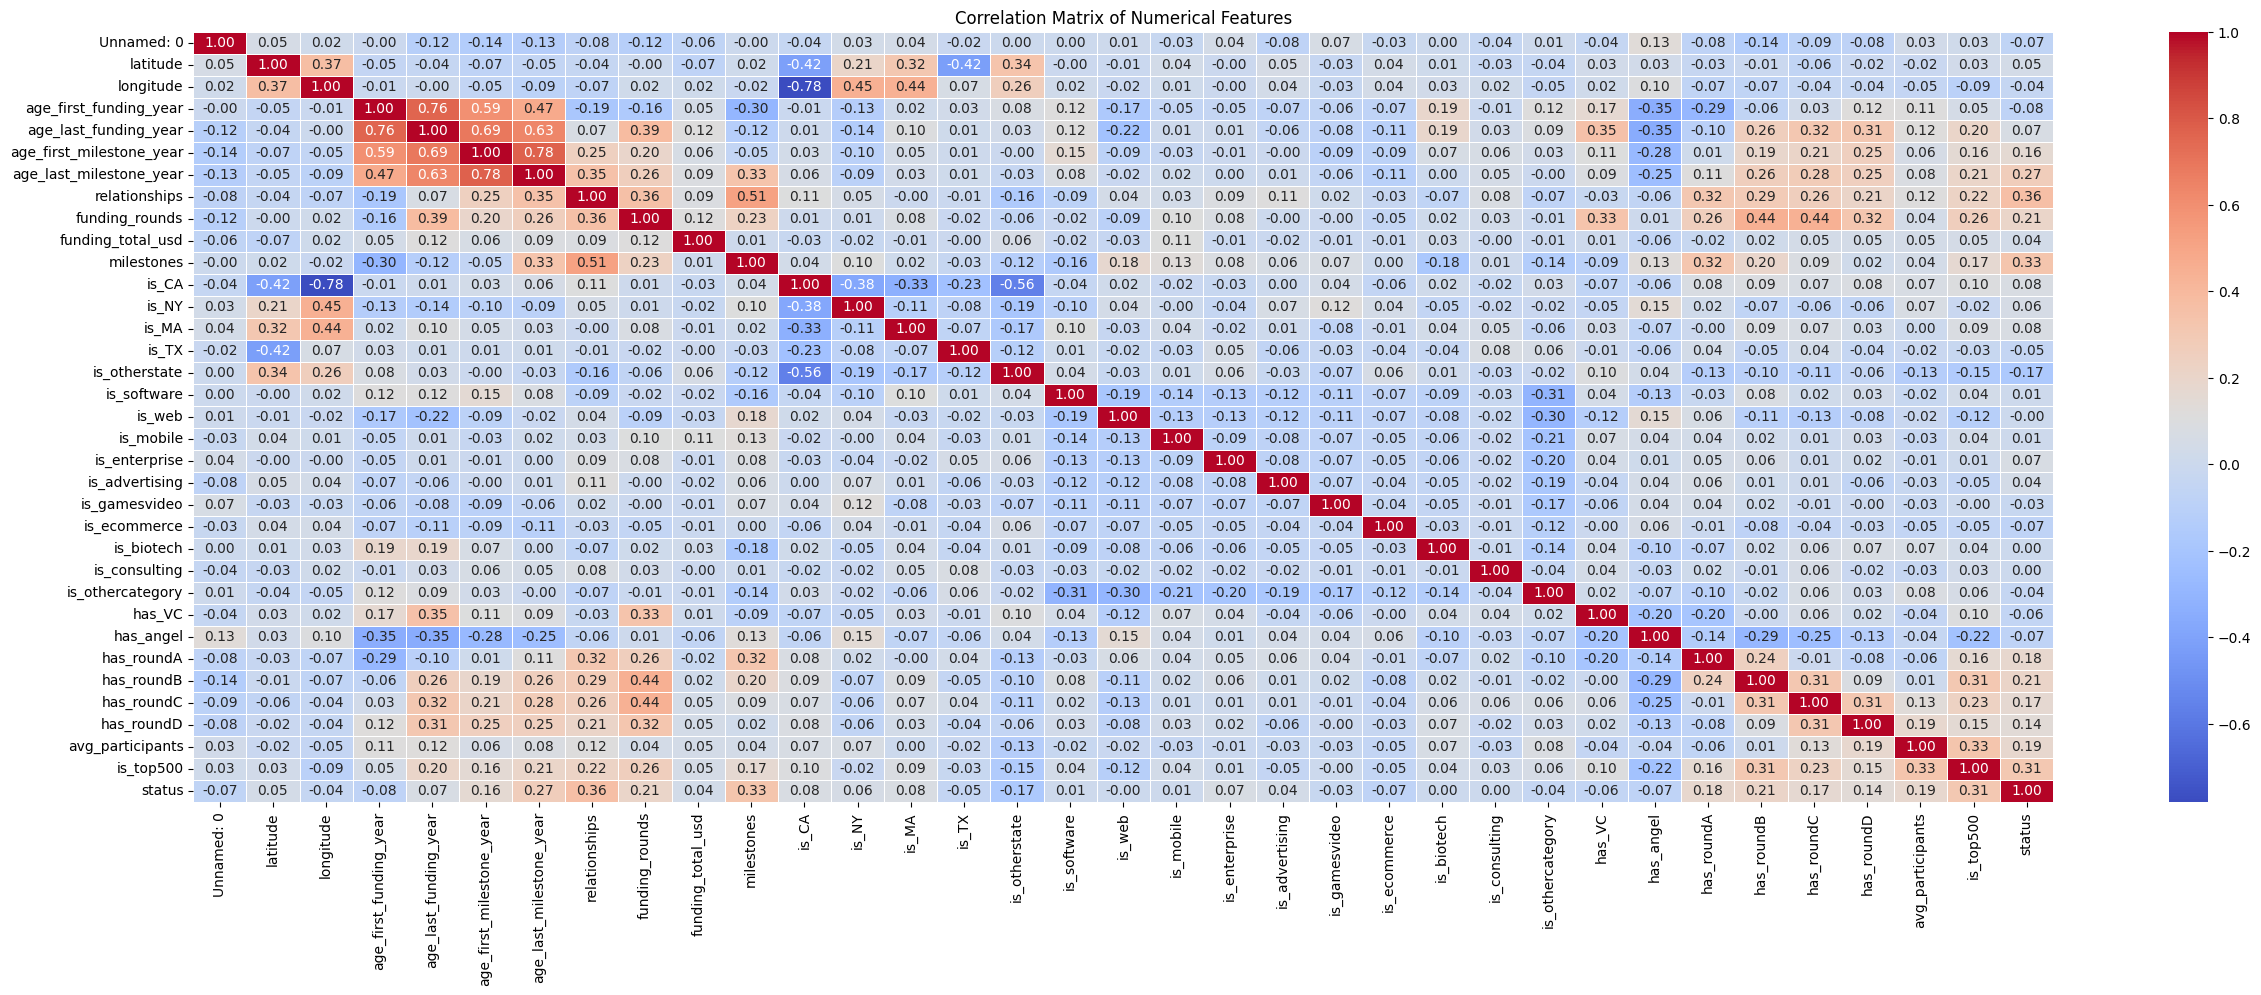

In [17]:
fig, ax = plt.subplots(figsize=(30,10))

# Select only numeric columns
corr = data.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    ax=ax
)

plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [18]:
data.describe(include=['float64','int64'])

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [19]:
data['Unnamed: 6'] = data.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010


In [20]:
data['closed_at']=data['closed_at'].fillna(value='31/12/2003')

In [21]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")

In [22]:
for index,row in data.iterrows():
    if row['state_code']!=row['state_code']:
        print(index,row['state_code'],row['state_code'])
data.drop(['state_code.1'],axis=1,inplace=True)

In [23]:
df_acquired = data[(data["status"] == True)]
df_acquired.shape

(597, 50)

In [24]:
df_acquired = data[(data["status"] == False)]
df_acquired.shape

(326, 50)

In [25]:
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
17,news,7,1,8,87.50
27,travel,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


In [26]:

funding_sorted_category = pd.pivot_table(data,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


In [27]:
state = data.groupby(['state_code']).size().rename('num_startup').reset_index()

most_state = state[state.groupby('state_code')['num_startup'].transform(max) == state['num_startup']]
most_state= most_state.sort_values('num_startup', ascending=False)
most_state

C:\Users\Happy\AppData\Local\Temp\ipykernel_2208\4272796933.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_state = state[state.groupby('state_code')['num_startup'].transform(max) == state['num_startup']]


,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
29,TX,42
32,WA,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


In [28]:
neg = ["age_first_funding_year", "age_last_funding_year",
       "age_first_milestone_year", "age_last_milestone_year"]

for col in neg:
    numeric_col = pd.to_numeric(data[col], errors='coerce')
    has_negative = (numeric_col < 0).any()
    print(f"Is there any negative value in '{col}' column: {has_negative}")

Is there any negative value in 'age_first_funding_year' column: True
Is there any negative value in 'age_last_funding_year' column: True
Is there any negative value in 'age_first_milestone_year' column: True
Is there any negative value in 'age_last_milestone_year' column: True


In [29]:
cols = ['age_first_funding_year', 'age_last_funding_year',
        'age_first_milestone_year', 'age_last_milestone_year']

for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data = data[data[col] >= 0]


In [30]:

data["age_first_funding_year"] = np.log1p(data["age_first_funding_year"])
data["age_last_funding_year"] = np.log1p(data["age_last_funding_year"])
data["age_first_milestone_year"] = np.log1p(data["age_first_milestone_year"])
data["age_last_milestone_year"] = np.log1p(data["age_last_milestone_year"])
data["funding_total_usd"] = np.log1p(data["funding_total_usd"])

In [31]:
data['has_RoundABCD'] = np.where((data['has_roundA'] == 1) | (data['has_roundB'] == 1) | (data['has_roundC'] == 1) | (data['has_roundD'] == 1), 1, 0)
data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0


In [32]:
data['has_Investor'] = np.where((data['has_VC'] == 1) | (data['has_angel'] == 1), 1, 0)
data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1


In [33]:
data['has_both'] = np.where((data['has_RoundABCD'] == 0) & (data['has_Investor'] == 1), 1, 0)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor,has_both
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1,1


In [34]:
data['invalid_startup'] = np.where((data['has_RoundABCD'] == 0) & (data['has_VC'] == 0) & (data['has_angel'] == 0), 1, 0)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year,has_RoundABCD,has_Investor,has_both,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2003,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,CA,other,2007,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2003,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2003,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,CA,web,2009,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2003,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,CA,software,2002,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010,0,1,1,0


In [35]:
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['closed_at'] = pd.to_datetime(data['closed_at'], errors='coerce')

# Calculate age of startup
data['age_closed_startup'] = data['closed_at'] - data['founded_at']
data['age_startup_year'] = data['age_closed_startup'].dt.days / 365

C:\Users\Happy\AppData\Local\Temp\ipykernel_2208\1565428869.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['closed_at'] = pd.to_datetime(data['closed_at'], errors='coerce')


In [36]:
import numpy as np

conditions = [
    (data['relationships'] <= 5),
    (data['relationships'] > 5) & (data['relationships'] <= 10),
    (data['relationships'] > 10) & (data['relationships'] <= 16),
    (data['relationships'] > 16)
]

values = ['4', '3', '2', '1']

data['tier_relationships'] = np.select(conditions, values, default='0')

In [37]:
data['tier_relationships'] = data.tier_relationships.astype(int)

In [38]:
data = data.drop(['state_code'],axis=1)
data = data.drop(['id'],axis=1)
data = data.drop(['Unnamed: 6'],axis=1)
data = data.drop(['category_code'],axis=1)
data = data.drop(['object_id'],axis=1)
data = data.drop(['zip_code'],axis=1)
data = data.drop(['founded_at'],axis=1)
data = data.drop(['closed_at'],axis=1)
data = data.drop(['first_funding_at'],axis=1)
data = data.drop(['last_funding_at'],axis=1)
data = data.drop(['city'],axis=1)
data = data.drop(['name'],axis=1)
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['latitude','longitude'],axis=1)
data = data.drop(['age_closed_startup'],axis=1)
data = data.drop(['relationships'],axis=1)

In [39]:
cat_feature = data.select_dtypes(include='object')
cat_feature.head()

,State,category,founded_year
0,CA,other,2007
1,CA,enterprise,2000
2,CA,web,2009
3,CA,software,2002
4,CA,games_video,2010


In [40]:
X = data.drop('status', axis = 1) #
y = data['status']

In [41]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

In [42]:
# Create a ColumnTransformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

In [43]:
# Apply the preprocessing
X_processed = preprocessor.fit_transform(X)
# After fitting the preprocessor
preprocessor.fit(X)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``.

In [44]:
# Get the transformed feature names
encoded_feature_names = []

# Get numerical feature names (they remain unchanged)
encoded_feature_names.extend(numerical_features)

# Get one-hot encoded categorical feature names
cat_ohe = preprocessor.named_transformers_['cat']
cat_feature_names = cat_ohe.get_feature_names_out(categorical_features)

# Add them to the full list
encoded_feature_names.extend(cat_feature_names)

In [45]:
# Print all feature names
print(" Total features used:", len(encoded_feature_names))
print("Feature names:")
for i, name in enumerate(encoded_feature_names):
    print(f"{i+1}. {name}")

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

 Total features used: 76
Feature names:
1. age_first_funding_year
2. age_last_funding_year
3. age_first_milestone_year
4. age_last_milestone_year
5. funding_rounds
6. funding_total_usd
7. milestones
8. is_CA
9. is_NY
10. is_MA
11. is_TX
12. is_otherstate
13. is_software
14. is_web
15. is_mobile
16. is_enterprise
17. is_advertising
18. is_gamesvideo
19. is_ecommerce
20. is_biotech
21. is_consulting
22. is_othercategory
23. has_VC
24. has_angel
25. has_roundA
26. has_roundB
27. has_roundC
28. has_roundD
29. avg_participants
30. is_top500
31. has_RoundABCD
32. has_Investor
33. has_both
34. invalid_startup
35. age_startup_year
36. tier_relationships
37. State_CA
38. State_MA
39. State_NY
40. State_TX
41. State_WA
42. State_other
43. category_advertising
44. category_biotech
45. category_enterprise
46. category_games_video
47. category_hardware
48. category_mobile
49. category_network_hosting
50. category_other
51. category_semiconductor
52. category_software
53. category_web
54. founded_ye

In [46]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 76)
Shape of the y Train : (672,)
Shape of the X test : (168, 76)
Shape of the y test : (168,)


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.metrics import auc,precision_recall_curve,f1_score

model = RandomForestClassifier()

model.fit(X_train,y_train)


y_pred_rf = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9702380952380952


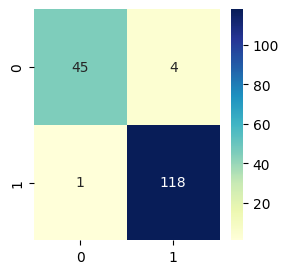

In [49]:
model_cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(model_cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [50]:
model_cr = classification_report(y_test, y_pred_rf)
print(model_cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        49
           1       0.97      0.99      0.98       119

    accuracy                           0.97       168
   macro avg       0.97      0.95      0.96       168
weighted avg       0.97      0.97      0.97       168

ROC Curves              = 0.9549819927971188
Precision-Recall Curves = 0.9823810671809707


In [51]:
import joblib
joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']